In [135]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread, imshow
from sklearn.feature_extraction import image
from sklearn.decomposition import PCA
from sklearn.decomposition import FastICA
from sklearn.decomposition import TruncatedSVD


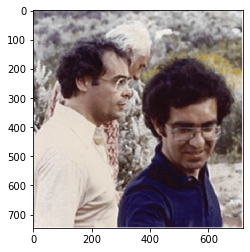

In [137]:
img = cv2.imread('davidmarr.png')
img2 = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img2)

#### David Marr and Francis Crick
Francis Harry Compton Crick (8 June 1916 – 28 July 2004) was an English molecular biologist, biophysicist, and neuroscientist. 

David Marr was a neuroscientist who played a major role in establishing computer vision fundamentals, made an effort to explain visual processing mechanisms.

In [138]:
img.shape, img

((746, 720, 3),
 array([[[159, 147, 153],
         [133, 117, 125],
         [133, 117, 125],
         ...,
         [255, 255, 255],
         [255, 254, 254],
         [255, 255, 255]],
 
        [[160, 149, 156],
         [134, 119, 128],
         [133, 119, 127],
         ...,
         [255, 255, 255],
         [254, 255, 254],
         [255, 255, 255]],
 
        [[163, 153, 159],
         [138, 125, 133],
         [136, 122, 132],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        ...,
 
        [[221, 225, 231],
         [215, 221, 229],
         [221, 226, 234],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 254, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        [[255, 255, 254],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [25

In [139]:
blue,green,red = cv2.split(img) 

# Principal component analysis (PCA)

PCA is just a method of summarizing some data.

We can describe each image by its some features. We can compose a whole list of features of each data. But many of them will measure related properties and so will be redundant. If so, we should be able to summarize each data with fewer characteristics! This is what PCA does.

PCA is not selecting some characteristics and discarding the others. Instead, it constructs some new characteristics that turn out to summarize our image array.

In fact, PCA finds the best possible characteristics, the ones that summarize the data as well as only possible (among all conceivable linear combinations). This is why it is so useful.

Source: https://stats.stackexchange.com/questions/2691/making-sense-of-principal-component-analysis-eigenvectors-eigenvalues



In [140]:
def find_pca(x):
    pca = PCA(x)

    red_transformed = pca.fit_transform(red)
    red_inverted = pca.inverse_transform(red_transformed)

    green_transformed = pca.fit_transform(green)
    green_inverted = pca.inverse_transform(green_transformed)

    blue_transformed = pca.fit_transform(blue)
    blue_inverted = pca.inverse_transform(blue_transformed)

    img_compressed = (np.dstack((red_inverted, green_inverted, blue_inverted))).astype(np.uint8)
    
    return img_compressed


<Figure size 432x288 with 0 Axes>

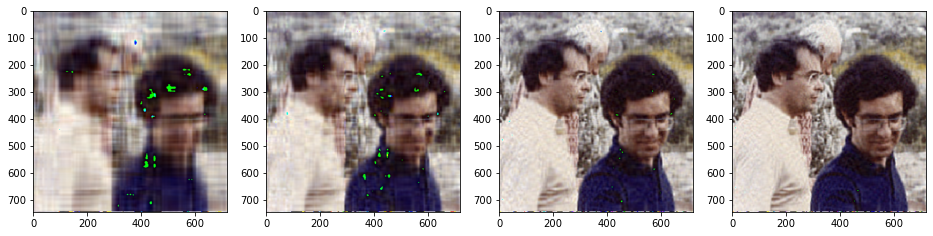

In [141]:
plt.figure()

f, axarr = plt.subplots(1,4,figsize=(16,16)) 

axarr[0].imshow(find_pca(8))
axarr[1].imshow(find_pca(15))
axarr[2].imshow(find_pca(30))
axarr[3].imshow(find_pca(40))


#  Independent Component Analysis (ICA)

In signal processing, independent component analysis (ICA) is a computational method for separating a multivariate signal into additive subcomponents. This is done by assuming that at most one subcomponent is a non-Gaussian signals and that the subcomponents are statistically independent from each other. ICA is a special case of blind source separation. A common example application is the "cocktail party problem" of listening in on one person's speech in a noisy room.

Source: https://en.wikipedia.org/wiki/Independent_component_analysis

In [143]:
def find_ica(x):
    ica = FastICA(x)

    red_transformed = ica.fit_transform(red)
    red_inverted = ica.inverse_transform(red_transformed)

    green_transformed = ica.fit_transform(green)
    green_inverted = ica.inverse_transform(green_transformed)

    blue_transformed = ica.fit_transform(blue)
    blue_inverted = ica.inverse_transform(blue_transformed)

    img_compressed = (np.dstack((red_inverted, green_inverted, blue_inverted))).astype(np.uint8)
    
    return img_compressed


/Users/berkingurcan/opt/anaconda3/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '


<Figure size 432x288 with 0 Axes>

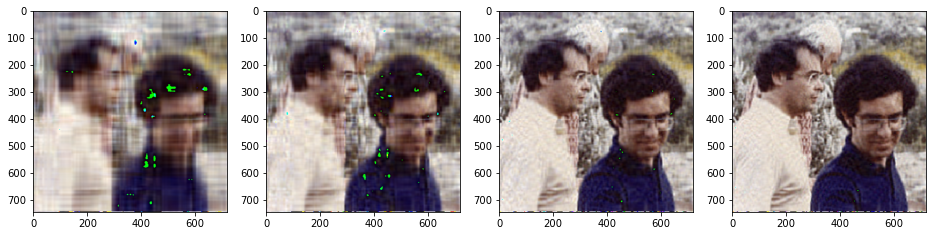

In [144]:
plt.figure()

f, axarr = plt.subplots(1,4,figsize=(16,16)) 

axarr[0].imshow(find_ica(8))
axarr[1].imshow(find_ica(15))
axarr[2].imshow(find_ica(30))
axarr[3].imshow(find_ica(40))

# Non-Negative Matrix Factorization (NMF)

Non-negative matrix factorization (NMF or NNMF), also non-negative matrix approximation is a group of algorithms in multivariate analysis and linear algebra where a matrix V is factorized into (usually) two matrices W and H, with the property that all three matrices have no negative elements. This non-negativity makes the resulting matrices easier to inspect. Also, in applications such as processing of audio spectrograms or muscular activity, non-negativity is inherent to the data being considered. Since the problem is not exactly solvable in general, it is commonly approximated numerically. 

Source: https://en.wikipedia.org/wiki/Non-negative_matrix_factorization

In [145]:
def find_nmf(x):
    nmf = NMF(x)

    red_transformed = nmf.fit_transform(red)
    red_inverted = nmf.inverse_transform(red_transformed)

    green_transformed = nmf.fit_transform(green)
    green_inverted = nmf.inverse_transform(green_transformed)

    blue_transformed = nmf.fit_transform(blue)
    blue_inverted = nmf.inverse_transform(blue_transformed)

    img_compressed = (np.dstack((red_inverted, green_inverted, blue_inverted))).astype(np.uint8)
    
    return img_compressed

/Users/berkingurcan/opt/anaconda3/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "
/Users/berkingurcan/opt/anaconda3/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:1090: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"
/Users/berkingurcan/opt/anaconda3/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "
/Users/berkingurcan/opt/anaconda3/lib/python3.8/site-packages/skle

<Figure size 432x288 with 0 Axes>

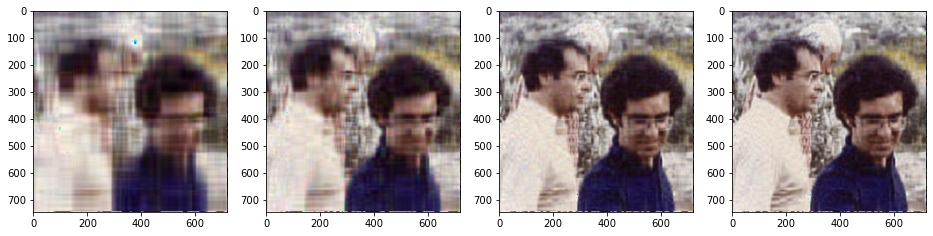

In [146]:
plt.figure()

f, axarr = plt.subplots(1,4,figsize=(16,16)) 

axarr[0].imshow(find_nmf(8))
axarr[1].imshow(find_nmf(15))
axarr[2].imshow(find_nmf(30))
axarr[3].imshow(find_nmf(40))